In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  2 03:32:51 2018

@author: ks
"""

# setup the matplotlib graphics library and configure it to show figures inline in the notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# make qutip available in the rest of the notebook
from qutip import *

In [101]:
#def compute(w1list, w2, w3, g12, g13):
def compute(waq_list, wc, wq, g, gac, N, M):
    # Pre-compute operators for the hamiltonian

    a   = tensor(destroy(N), qeye(2), qeye(2)) # destroy of cavity
    sm  = tensor(qeye(N), destroy(2), qeye(2)) # destroy of qubit
    sam = tensor(qeye(N), qeye(2), destroy(2)) # destroy of ancilla

    nq  = tensor(qeye(N), sigmaz(), qeye(2)) # number of qubit
    nc  = tensor(destroy(N).dag() * destroy(N), qeye(2), qeye(2)) # number of cavity
    naq  = tensor(qeye(N), qeye(2), sigmaz()) # number of ancilla
    
    parity_op = -tensor(((0+np.pi*1j)*destroy(N).dag() * destroy(N)).expm(), sigmaz(), sigmaz())
    zero_parity_op = -tensor(((0+np.pi*1j)*destroy(N).dag() * destroy(N)).expm(), sigmaz(), sigmaz())
    
    # total parity_oprator
    zero = tensor(basis(N, 0) - basis(N, 0), basis(2,0) - basis(2,0), basis(2, 0) - basis(2, 0))
    
    idx = 0
    err = 0
    
    evals_posi_mat = np.zeros((len(waq_list), N*2))
    evals_nega_mat = np.zeros((len(waq_list), N*2))
    
    for waq in waq_list:
        
        tmp_p_list = []
        tmp_m_list = []

        # evaluate the Hamiltonian
        H = 0.5 * (waq + 0.1 - M) * naq + 0.5 * wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() + a) * (sam + sam.dag())
      
        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()       
        
        for i in range(N * 2 * 2):
            ei = parity_op * ekets[i] + ekets[i]
            if ei == zero:
                tmp_p_list.append(evals[i])
            elif ei == 2*ekets[i]:
                tmp_m_list.append(evals[i])
            else:
                print("exceptional", i)
                err = i
                return i, ekets[i], ekets[i]
                
                
        evals_posi = np.asarray(tmp_p_list)
        evals_nega = np.asarray(tmp_m_list)
        
        evals_posi_mat[idx,:] = np.real(evals_posi)
        evals_nega_mat[idx,:] = np.real(evals_nega)
        
        idx += 1
    return evals_posi_mat, evals_nega_mat, ekets

In [108]:
wc  = 1.0 * 2 * np.pi   # cavity frequency
wq  = 1.0 * 2 * np.pi   # qubit frequency
g   = 2.0 * 2 * np.pi   # cavity-qubit coupling strength
gac = 0.02 * 2 * np.pi  # ancilla-cavity coupling strength
N   = 10
M   = 0 * 2 * np.pi
waq_max = 2

waq_list = np.linspace(0, waq_max, 80) * 2.0 * np.pi # ancilla frequency range

evals_posi_mat, evals_nega_mat, ekets= compute(waq_list, wc, wq, g, gac, N, M)

error


TypeError: 'int' object is not subscriptable

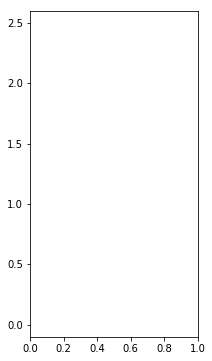

In [111]:
fig, bx = plt.subplots(figsize=(3,6))
snum = 8
plt.ylim([-0.1,2.6])

for n in range(snum):
    bx.plot((waq_list - M) / (2*np.pi), (evals_posi_mat[:,n] - evals_posi_mat[:, 0]) / (2*np.pi), 'r', linewidth = 1)
    bx.plot((waq_list - M) / (2*np.pi), (evals_nega_mat[:,n] - evals_posi_mat[:, 0]) / (2*np.pi), 'b', linestyle = "dashed", linewidth = 1)
    
bx.set_xlabel('Energy splitting of ancilla')
bx.set_ylabel('Eigenenergies')
bx.set_title( 'Energy spectrum of three coupled qubits');

In [60]:
H

Quantum object: dims = [[15, 2, 2], [15, 2, 2]], shape = (60, 60), type = oper, isherm = True
Qobj data =
[[ 9.42977796  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -3.14659265  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          3.14659265 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 84.81800165  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         91.11118695
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  78.53481634]]

In [104]:
evals_posi_mat

0